In [25]:
pip install Keras-Preprocessing

Note: you may need to restart the kernel to use updated packages.


In [109]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPool1D

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, r2_score, classification_report


In [27]:
import keras

In [28]:
keras.__version__

'3.7.0'

In [29]:
df = pd.read_csv('./datasets/bitcointweets.csv')

In [30]:
df.head()

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [31]:
df.columns = ['date', 'text', 'author', 'id', 'unknown', 'tags', 'url', 'sentiment']

In [32]:
df.drop(['id', 'unknown'], axis=1, inplace=True)

In [33]:
df['sentiment'].value_counts()

sentiment
['positive']    22937
['neutral']     21938
['negative']     5983
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='sentiment'>

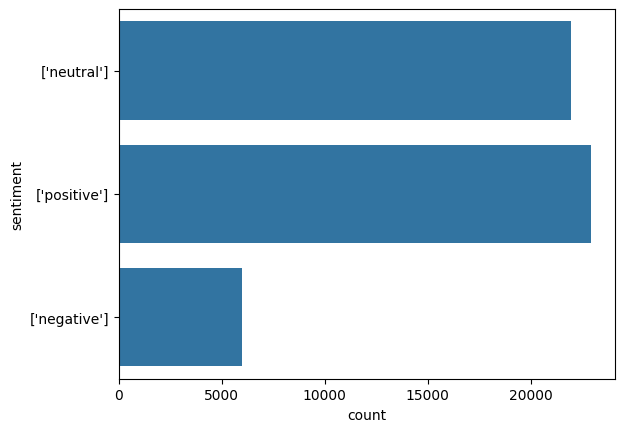

In [34]:
sns.countplot(df['sentiment'])

In [35]:
df['text_length'] = df['text'].apply(len)

In [36]:
df

,date,text,author,tags,url,sentiment,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138
...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],140
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],121


<Axes: >

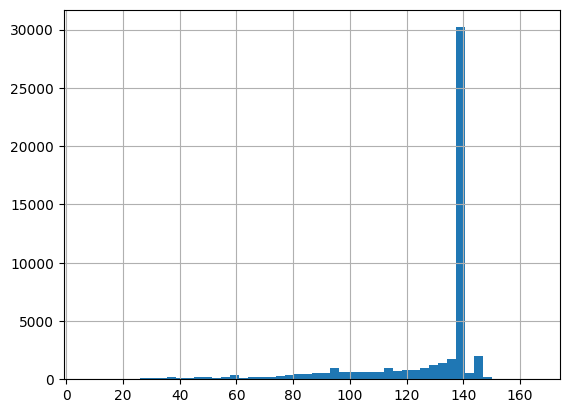

In [37]:
df['text_length'].hist(bins=50)

In [38]:
y = pd.get_dummies(df['sentiment'])

In [39]:
y

,['negative'],['neutral'],['positive']
0,False,True,False
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
50853,False,False,True
50854,False,False,True
50855,False,True,False
50856,False,False,True


In [40]:
x = df['text']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [42]:
len(x_train)

40686

In [48]:
tokenizer = Tokenizer(num_words=10000)

In [49]:
tokenizer.fit_on_texts(x_train)

In [51]:
x_train

9950       Get Free Bitcoin        https://t.co/5l88WfkNS9
26524    RT @coindesk: Bitcoin Will Be World's 'Single ...
17327    RT @CoinsAirdrops: #Bitcoin #crypto #blockchai...
20498    RT @MoHossain: ‘Crypto Valley’ ....Switzerland...
45601    RT @Cointelegraph: Dutch judge rules #Bitcoin ...
                               ...                        
12881    💣 20$ for free registering to Binance 💣\n\n0.1...
42735    Why Should Anyone HODL Litecoin in 2018 https:...
10961    RT SpirosMargaris: Better #Bitcoin Relay? \n\n...
38016    Bitcoin Price Technical Analysis for 03/23/201...
28648    Coinbase In Talks to Buy Bitcoin Startup https...
Name: text, Length: 40686, dtype: object

In [50]:
tokenizer.word_index

{'https': 1,
 't': 2,
 'co': 3,
 'bitcoin': 4,
 'rt': 5,
 'the': 6,
 'to': 7,
 'and': 8,
 'a': 9,
 'of': 10,
 'is': 11,
 'in': 12,
 'for': 13,
 'blockchain': 14,
 'you': 15,
 'airdrop': 16,
 'crypto': 17,
 'on': 18,
 'cryptocurrency': 19,
 'our': 20,
 'with': 21,
 '…': 22,
 'ethereum': 23,
 '1': 24,
 'will': 25,
 'are': 26,
 'bethereumteam': 27,
 'your': 28,
 'btc': 29,
 'we': 30,
 'i': 31,
 '0': 32,
 'that': 33,
 'be': 34,
 'new': 35,
 'this': 36,
 '000': 37,
 'money': 38,
 'price': 39,
 'have': 40,
 'amp': 41,
 'ico': 42,
 'how': 43,
 'out': 44,
 'do': 45,
 'gymrewards': 46,
 'it': 47,
 'at': 48,
 'what': 49,
 'can': 50,
 'about': 51,
 'by': 52,
 'get': 53,
 "we're": 54,
 'more': 55,
 'earn': 56,
 'token': 57,
 'from': 58,
 'now': 59,
 'copy': 60,
 'buy': 61,
 '2': 62,
 'all': 63,
 'free': 64,
 'as': 65,
 'follow': 66,
 '5': 67,
 'us': 68,
 'satoshi': 69,
 'eth': 70,
 'coin': 71,
 '📢': 72,
 'been': 73,
 '10': 74,
 'like': 75,
 'up': 76,
 'today': 77,
 'why': 78,
 'supply': 79,
 'my':

In [52]:
x_train = tokenizer.texts_to_sequences(x_train)

In [54]:
x_train

[[53, 64, 4, 1, 2, 3],
 [5,
  353,
  4,
  25,
  34,
  567,
  1168,
  1179,
  284,
  135,
  216,
  1,
  2,
  3,
  2132,
  1,
  2,
  3,
  2133],
 [5,
  185,
  4,
  17,
  14,
  16,
  56,
  1514,
  1239,
  12,
  510,
  58,
  510,
  1648,
  770,
  519,
  72,
  2598],
 [5,
  4232,
  1922,
  5962,
  5428,
  11,
  59,
  1292,
  305,
  12,
  786,
  2772,
  8,
  7457,
  2462,
  1,
  2,
  3,
  8776,
  4233],
 [5,
  356,
  181,
  645,
  272,
  4,
  9,
  226,
  236,
  314,
  187,
  13,
  17,
  312,
  65,
  375,
  661,
  1,
  2,
  3,
  22],
 [511, 403, 561, 532, 8, 305, 351, 582, 21, 4, 38, 5963, 1, 2, 3],
 [14, 29, 17, 19, 4, 23, 70, 2134, 6, 82, 14, 195, 7, 469, 737, 1, 2, 3],
 [2085, 3827, 56, 64, 459, 52, 177, 1200, 43, 7, 56, 64, 4, 1, 2, 3],
 [61, 19, 21, 9, 535, 978, 1, 2, 3, 740, 17, 14, 42, 8777, 1, 2, 3],
 [5,
  27,
  176,
  10,
  15,
  255,
  915,
  914,
  6,
  722,
  13,
  20,
  916,
  30,
  26,
  83,
  10,
  6,
  897,
  17,
  377,
  378],
 [5,
  2599,
  5964,
  1169,
  1462,
  7,
  5965

In [55]:
x_test

33246    RT @Crypto_Roboto: One challenge to understand...
23630    RT @adamludwin: 1/Satoshi said Bitcoin was for...
46618    @AirdropKitty Bitcoin BTG(OFFICIAL) (BTG) do  ...
39756    RT @Varanida_VAD: [Podcast] How the blockchain...
14590    Fri Mar 23 04:07:13 2018 (3:55)\nUSD : 8412.55...
                               ...                        
21444    RT @coindesk: Coinbase Is In Talks to Buy One ...
13511    RT @HorizonCoin: Awesome news for #Bermuda and...
24885    JPMorgan working on potential spin... #Bitcoin...
43078    RT @ElixiumCrypto: Mass Adoption of #Bitcoin 🙌...
21931    RT @theoriginalkenp: or you could throw racks ...
Name: text, Length: 10172, dtype: object

In [56]:
x_test = tokenizer.texts_to_sequences(x_test)

In [57]:
x_test

[[5,
  17,
  83,
  680,
  7,
  1905,
  4,
  11,
  33,
  47,
  11,
  9,
  9394,
  1683,
  9395,
  817,
  33,
  11,
  9396],
 [5,
  1352,
  24,
  69,
  594,
  4,
  217,
  13,
  2018,
  18,
  6,
  2019,
  6,
  82,
  1377,
  1535,
  10,
  6,
  4,
  1070,
  1493,
  44,
  1519,
  586],
 [945,
  4,
  243,
  94,
  243,
  45,
  543,
  604,
  41,
  1079,
  924,
  212,
  81,
  15,
  101,
  344,
  2684,
  1,
  2,
  3],
 [5,
  2887,
  43,
  6,
  14,
  50,
  98,
  6,
  257,
  10,
  1237,
  40,
  15,
  7,
  20,
  2887,
  1037,
  1,
  2,
  3,
  22],
 [2417,
  1133,
  311,
  1367,
  1529,
  905,
  97,
  132,
  2319,
  122,
  4115,
  2319,
  2697,
  32,
  1270,
  2545,
  8589,
  948,
  326,
  697,
  1392,
  1450,
  621,
  32,
  32,
  2698,
  4],
 [5,
  46,
  61,
  46,
  179,
  201,
  107,
  11,
  1778,
  1,
  2,
  3,
  2224,
  42,
  19,
  413,
  252,
  127,
  2225],
 [5,
  1680,
  4,
  11,
  18,
  251,
  398,
  7,
  34,
  48,
  2051,
  142,
  1258,
  12,
  9,
  1550,
  10,
  227,
  277,
  50,
  188,
  7

In [58]:
total = [len(text) for text in x_train]

In [59]:
total

[6,
 19,
 18,
 20,
 21,
 15,
 18,
 16,
 17,
 22,
 20,
 24,
 25,
 19,
 20,
 20,
 16,
 23,
 17,
 11,
 19,
 16,
 10,
 17,
 15,
 24,
 21,
 19,
 20,
 21,
 21,
 13,
 16,
 15,
 20,
 22,
 20,
 11,
 13,
 19,
 16,
 21,
 24,
 15,
 24,
 26,
 11,
 6,
 23,
 19,
 23,
 26,
 20,
 18,
 20,
 22,
 19,
 23,
 13,
 14,
 24,
 23,
 15,
 26,
 23,
 14,
 25,
 22,
 12,
 15,
 23,
 18,
 17,
 24,
 24,
 13,
 14,
 27,
 24,
 23,
 19,
 23,
 28,
 19,
 24,
 21,
 23,
 21,
 22,
 29,
 23,
 18,
 19,
 17,
 24,
 29,
 24,
 21,
 21,
 24,
 20,
 23,
 18,
 13,
 19,
 20,
 23,
 21,
 12,
 23,
 22,
 11,
 22,
 24,
 18,
 21,
 22,
 16,
 17,
 19,
 20,
 20,
 24,
 15,
 16,
 22,
 15,
 13,
 18,
 16,
 24,
 22,
 13,
 27,
 18,
 19,
 26,
 17,
 14,
 26,
 16,
 23,
 22,
 23,
 14,
 14,
 21,
 24,
 23,
 24,
 26,
 20,
 21,
 23,
 17,
 14,
 20,
 19,
 22,
 22,
 17,
 24,
 22,
 20,
 24,
 19,
 19,
 23,
 22,
 14,
 20,
 7,
 19,
 23,
 24,
 21,
 24,
 5,
 22,
 25,
 19,
 14,
 23,
 22,
 3,
 24,
 17,
 13,
 26,
 17,
 16,
 13,
 16,
 13,
 22,
 20,
 22,
 19,
 19,
 17,
 15,


(array([1.200e+01, 2.600e+01, 4.900e+01, 0.000e+00, 1.670e+02, 2.090e+02,
        0.000e+00, 3.160e+02, 3.290e+02, 0.000e+00, 4.190e+02, 3.810e+02,
        4.580e+02, 0.000e+00, 8.340e+02, 9.380e+02, 0.000e+00, 1.386e+03,
        1.390e+03, 0.000e+00, 1.829e+03, 1.856e+03, 2.756e+03, 0.000e+00,
        2.862e+03, 4.078e+03, 0.000e+00, 3.803e+03, 3.244e+03, 0.000e+00,
        4.060e+03, 2.248e+03, 3.492e+03, 0.000e+00, 1.704e+03, 9.400e+02,
        0.000e+00, 4.940e+02, 2.100e+02, 0.000e+00, 1.630e+02, 2.300e+01,
        8.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ,
         8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. , 15.7,
        16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. , 22.7, 23.4,
        24.1, 24.8, 25.5, 26.2, 26.9, 27.6, 28.3, 29. , 29.7, 30.4, 31.1,
        31.8, 32.5, 33.2, 33.9, 34.6, 35.3, 36. ]),
 <BarContainer object of 50 

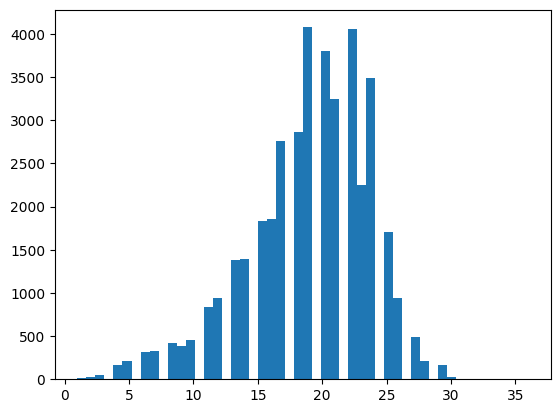

In [61]:
plt.hist(total, bins=50)

In [62]:
np.average(total)

18.910190237428107

In [63]:
max_words = 23

In [66]:
x_train = sequence.pad_sequences(x_train, maxlen=max_words)

In [67]:
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [95]:
model = Sequential()

In [96]:
model.add(Embedding(10000, 150, input_length=23))

c:\Users\Ace\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [97]:
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [98]:
model.add(MaxPool1D(pool_size=2))

In [99]:
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [100]:
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

In [101]:
model.add(Dense(3, activation='softmax'))

In [102]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [105]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 23, 150)        │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 23, 32)         │        14,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 11, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        53,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,713,119 (17.98 MB)

 Trainable params: 1,571,039 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,142,080 (11.99 MB)

In [103]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.6086 - val_loss: 0.1160
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0761 - val_loss: 0.0959
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0387 - val_loss: 0.1198
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0246 - val_loss: 0.1258
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0197 - val_loss: 0.1224
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0122 - val_loss: 0.1333
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0071 - val_loss: 0.1522
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0087 - val_loss: 0.1514
Epoch 9/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0068 - val_loss: 0.1661
Epoch 10/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0080 - val_loss: 0.1590


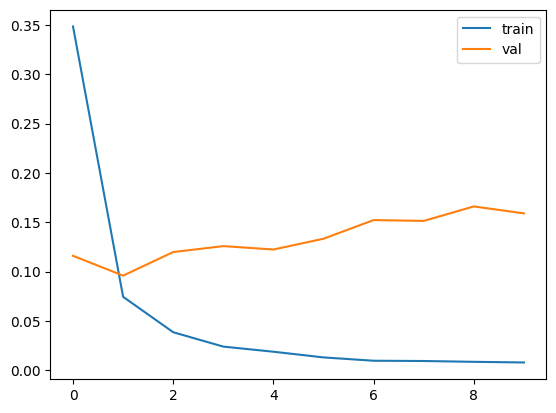

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])

In [106]:
y_pred = model.predict(x_test)

318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [108]:
y_pred = y_pred.round()

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1194
           1       0.98      0.98      0.98      4366
           2       0.97      0.98      0.98      4612

   micro avg       0.98      0.97      0.97     10172
   macro avg       0.97      0.96      0.97     10172
weighted avg       0.97      0.97      0.97     10172
 samples avg       0.97      0.97      0.97     10172



c:\Users\Ace\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
cnf = confusion_matrix(np.argmax(list(y_test.values), axis=1), np.argmax(y_pred, axis=1))

<Axes: >

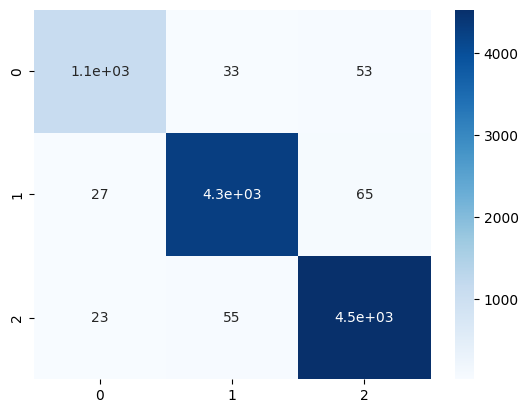

In [121]:
sns.heatmap(cnf, cmap='Blues', annot=True)

In [122]:
print(f1_score(y_test, y_pred, average='macro'))

0.9666157202636958
